<a href="https://colab.research.google.com/github/Wolfinmoon/telecomX_pt-2/blob/main/TelecomX_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carregamento e Limpeza

In [2]:
try:
    df = pd.read_csv('TelecomX_Dataset_Transformado.csv')
    print("Arquivo carregado com sucesso!")

    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)
    if 'customerID' in df.columns:
        df.drop('customerID', axis=1, inplace=True)

    print("Colunas de ID removidas. Visualizando os dados:")
    display(df.head())

except FileNotFoundError:
    print("ERRO: O arquivo 'TelecomX_Dataset_Transformado.csv' n√£o foi encontrado.")

Arquivo carregado com sucesso!
Colunas de ID removidas. Visualizando os dados:


Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0    No          Female                       0              Yes   
1    No            Male                       0               No   
2   Yes            Male                       0               No   
3   Yes            Male                       1              Yes   
4   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService internet.OnlineSecurity  ...  \
0                      DSL                      No  ...   
1                      DSL                      No  ...   
2              Fiber optic                      No  ...   
3              Fiber optic                      No  ...   
4              Fiber optic                      No  ...   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  \
0          Mailed check                    65.6                 593.30   
1          Mailed check                    59.9                 542.40   
2      Electronic check                    73.9                 280.85   
3      Electronic check                    98.0                1237.85   
4          Mailed check                    83.9                 267.40   

   Contas_Diarias  
0        2.186667  
1        1.996667  
2        2.463333  
3        3.266667  
4        2.796667  

[5 rows x 21 columns]

## An√°lise da Propor√ß√£o de Evas√£o (Churn)

Propor√ß√£o de Churn no dataset (%):
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


/tmp/ipython-input-3-2858939989.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette=['#4CAF50', '#F44336'])


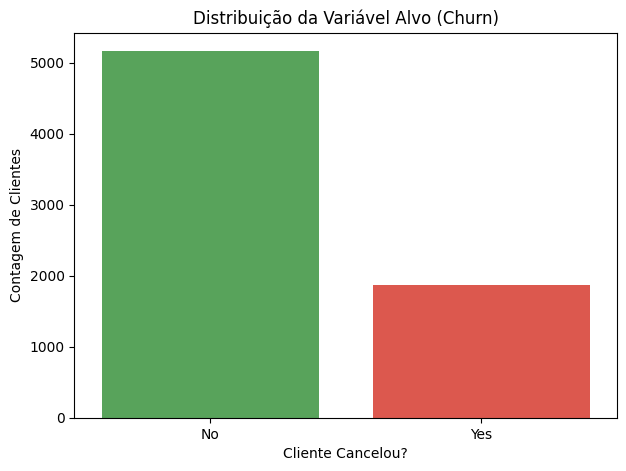

In [3]:
print("Propor√ß√£o de Churn no dataset (%):")
print(df['Churn'].value_counts(normalize=True) * 100)

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Churn', palette=['#4CAF50', '#F44336'])
plt.title('Distribui√ß√£o da Vari√°vel Alvo (Churn)')
plt.xlabel('Cliente Cancelou?')
plt.ylabel('Contagem de Clientes')
plt.show()

##Prepara√ß√£o dos Dados para Modelagem (Encoding)


In [5]:
from sklearn.preprocessing import LabelEncoder

X = df.drop('Churn', axis=1)
y_text = df['Churn']

le = LabelEncoder()
y = le.fit_transform(y_text)

X_encoded = pd.get_dummies(X, drop_first=True)

print("Shape original de X:", X.shape)
print("Shape de X ap√≥s o One-Hot Encoding:", X_encoded.shape)
print("\nExemplo das features codificadas:")
display(X_encoded.head())

Shape original de X: (7032, 20)
Shape de X ap√≥s o One-Hot Encoding: (7032, 31)

Exemplo das features codificadas:


customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   account.Charges.Total  Contas_Diarias  customer.gender_Male  \
0                 593.30        2.186667                 False   
1                 542.40        1.996667                  True   
2                 280.85        2.463333                  True   
3                1237.85        3.266667                  True   
4                 267.40        2.796667                 False   

   customer.Partner_Yes  customer.Dependents_Yes  phone.PhoneService_Yes  \
0                  True                     True                    True   
1                 False                    False                    True   
2                 False                    False                    True   
3                  True                    False                    True   
4                  True                    False                    True   

   phone.MultipleLines_No phone service  ...  \
0                                 False  ...   
1                                 False  ...   
2                                 False  ...   
3                                 False  ...   
4                                 False  ...   

   internet.StreamingTV_No internet service  internet.StreamingTV_Yes  \
0                                     False                      True   
1                                     False                     False   
2                                     False                     False   
3                                     False                      True   
4                                     False                      True   

   internet.StreamingMovies_No internet service  internet.StreamingMovies_Yes  \
0                                         False                         False   
1                                         False                          True   
2                                         False                         False   
3                                         False                          True   
4                                         False                         False   

   account.Contract_One year  account.Contract_Two year  \
0                       True                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
4                      False                      False   

   account.PaperlessBilling_Yes  \
0                          True   
1                         False   
2                          True   
3                          True   
4                          True   

   account.PaymentMethod_Credit card (automatic)  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   account.PaymentMethod_Electronic check  account.PaymentMethod_Mailed check  
0                                   False                                True  
1                                   False                                True  
2                                    True                               False  
3                                    True                               False  
4                                   False                                True  

[5 rows x 31 columns]

##Divis√£o e Padroniza√ß√£o

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dados divididos em treino ({X_train.shape[0]} amostras) e teste ({X_test.shape[0]} amostras).")

colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()
colunas_numericas.remove('customer.SeniorCitizen')

scaler = StandardScaler()


X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])

X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

print("\nFeatures num√©ricas padronizadas com sucesso!")
print("Exemplo de alguns dados de treino ap√≥s a padroniza√ß√£o:")
display(X_train.head())

Dados divididos em treino (5625 amostras) e teste (1407 amostras).

Features num√©ricas padronizadas com sucesso!
Exemplo de alguns dados de treino ap√≥s a padroniza√ß√£o:


customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
1416                       0         0.184279                -1.479254   
6993                       0         1.443383                 1.155008   
3417                       1        -1.196675                 0.300203   
4559                       0        -0.952977                 0.137225   
3604                       0         0.955988                 0.012497   

      account.Charges.Total  Contas_Diarias  customer.gender_Male  \
1416              -0.698974       -1.479254                  True   
6993               1.923342        1.155008                  True   
3417              -0.919135        0.300203                 False   
4559              -0.744566        0.137225                  True   
3604               0.537220        0.012497                 False   

      customer.Partner_Yes  customer.Dependents_Yes  phone.PhoneService_Yes  \
1416                  True                    False                    True   
6993                  True                     True                    True   
3417                 False                    False                    True   
4559                  True                    False                    True   
3604                  True                     True                    True   

      phone.MultipleLines_No phone service  ...  \
1416                                 False  ...   
6993                                 False  ...   
3417                                 False  ...   
4559                                 False  ...   
3604                                 False  ...   

      internet.StreamingTV_No internet service  internet.StreamingTV_Yes  \
1416                                      True                     False   
6993                                     False                      True   
3417                                     False                     False   
4559                                     False                      True   
3604                                     False                      True   

      internet.StreamingMovies_No internet service  \
1416                                          True   
6993                                         False   
3417                                         False   
4559                                         False   
3604                                         False   

      internet.StreamingMovies_Yes  account.Contract_One year  \
1416                         False                      False   
6993                          True                      False   
3417                         False                      False   
4559                         False                      False   
3604                         False                       True   

      account.Contract_Two year  account.PaperlessBilling_Yes  \
1416                      False                         False   
6993                       True                          True   
3417                      False                         False   
4559                      False                          True   
3604                      False                         False   

      account.PaymentMethod_Credit card (automatic)  \
1416                                          False   
6993                                          False   
3417                                          False   
4559                                          False   
3604                                          False   

      account.PaymentMethod_Electronic check  \
1416                                   False   
6993                                    True   
3417                                    True   
4559                                   False   
3604                                   False   

      account.PaymentMethod_Mailed check  
1416                               False  
6993                               False  
3417                               False  
4559    

##An√°lise de Correla√ß√£o

/tmp/ipython-input-8-3864254248.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_churn_sorted.values, y=corr_churn_sorted.index, palette='coolwarm_r')


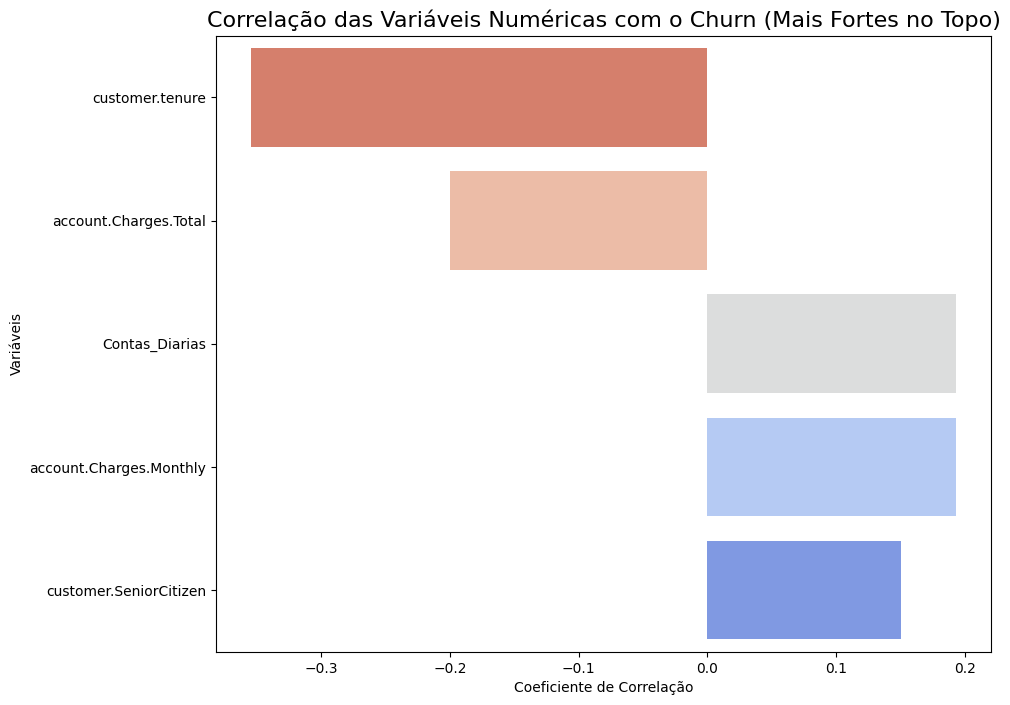

In [8]:
df_corr = df.copy()

df_corr['Churn'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

colunas_numericas = df_corr.select_dtypes(include=np.number).columns

corr_churn = df_corr[colunas_numericas].corr()['Churn'].drop('Churn')


corr_churn_sorted = corr_churn.reindex(corr_churn.abs().sort_values(ascending=False).index)


plt.figure(figsize=(10, 8))
sns.barplot(x=corr_churn_sorted.values, y=corr_churn_sorted.index, palette='coolwarm_r')
plt.title('Correla√ß√£o das Vari√°veis Num√©ricas com o Churn (Mais Fortes no Topo)', fontsize=16)
plt.xlabel('Coeficiente de Correla√ß√£o')
plt.ylabel('Vari√°veis')
plt.show()

##An√°lises Direcionadas com Gr√°ficos

### Tempo de Contrato (Tenure) vs. Evas√£o (Churn)

/tmp/ipython-input-9-3750078838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='customer.tenure', palette=['#4CAF50', '#F44336'])


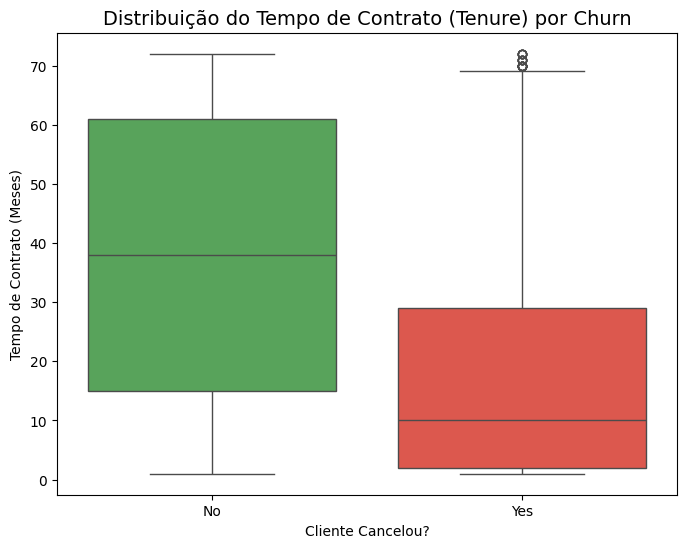

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='customer.tenure', palette=['#4CAF50', '#F44336'])
plt.title('Distribui√ß√£o do Tempo de Contrato (Tenure) por Churn', fontsize=14)
plt.xlabel('Cliente Cancelou?')
plt.ylabel('Tempo de Contrato (Meses)')
plt.show()

### Total Gasto vs. Evas√£o (Churn)

/tmp/ipython-input-10-312965399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='account.Charges.Total', palette=['#4CAF50', '#F44336'])


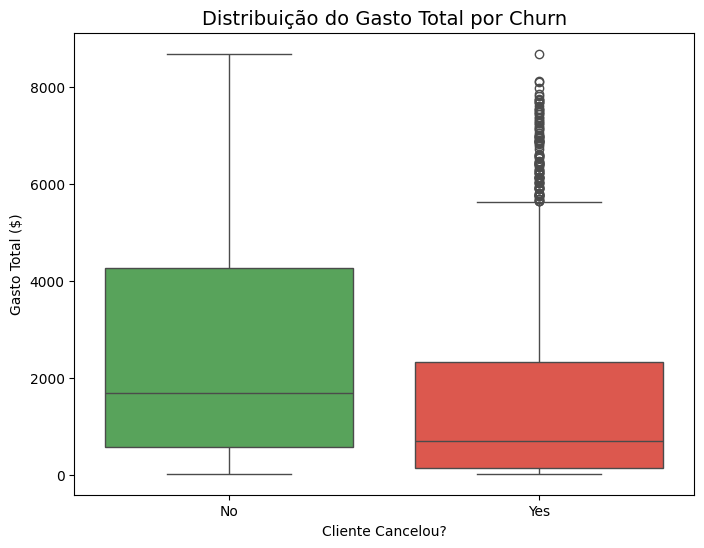

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='account.Charges.Total', palette=['#4CAF50', '#F44336'])
plt.title('Distribui√ß√£o do Gasto Total por Churn', fontsize=14)
plt.xlabel('Cliente Cancelou?')
plt.ylabel('Gasto Total ($)')
plt.show()

##Separa√ß√£o dos Dados e Cria√ß√£o dos Modelos

## Justificativa dos Modelos e da Padroniza√ß√£o:

1. **Regress√£o Log√≠stica:** Escolhemos este modelo por ser um excelente ponto de partida (baseline). √â um algoritmo linear, r√°pido e muito interpret√°vel. Ele exige padroniza√ß√£o porque seu mecanismo de aprendizado (baseado em gradiente descendente) √© sens√≠vel √† escala das vari√°veis. Se uma vari√°vel tiver uma escala muito maior que outra (ex: Gasto Total vs. Meses de Contrato), o modelo pode atribuir um peso indevido a ela. A padroniza√ß√£o garante que todas as vari√°veis contribuam de forma justa.

2. **Random Forest:** Este √© um modelo baseado em √°rvores de decis√£o. √â mais complexo e poderoso, capaz de capturar rela√ß√µes n√£o-lineares nos dados. Ele n√£o exige padroniza√ß√£o, pois suas decis√µes s√£o baseadas em divis√µes de valores (ex: "tenure < 10.5"), n√£o em dist√¢ncias. No entanto, trein√°-lo com os dados j√° padronizados n√£o prejudica sua performance.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.20, random_state=42, stratify=y)

print("--- 1. Separa√ß√£o de Dados ---")
print(f"Formato dos dados de treino (X_train): {X_train.shape}")
print(f"Formato dos dados de teste (X_test):  {X_test.shape}")

colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()
if 'customer.SeniorCitizen' in colunas_numericas:
    colunas_numericas.remove('customer.SeniorCitizen')


scaler = StandardScaler()


X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])


X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])
print("\n--- 2. Padroniza√ß√£o ---")
print("Dados num√©ricos padronizados com sucesso.")


print("\n--- 3. Cria√ß√£o e Treinamento ---")

log_reg_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg_model.fit(X_train, y_train)
print("Modelo de Regress√£o Log√≠stica treinado.")

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
print("Modelo de Random Forest treinado.")

--- 1. Separa√ß√£o de Dados ---
Formato dos dados de treino (X_train): (5625, 31)
Formato dos dados de teste (X_test):  (1407, 31)

--- 2. Padroniza√ß√£o ---
Dados num√©ricos padronizados com sucesso.

--- 3. Cria√ß√£o e Treinamento ---
Modelo de Regress√£o Log√≠stica treinado.
Modelo de Random Forest treinado.


##Avalia√ß√£o e An√°lise Cr√≠tica dos Modelos

AVALIA√á√ÉO DO MODELO DE REGRESS√ÉO LOG√çSTICA

--- Performance nos Dados de TREINO ---
Acur√°cia: 0.7527
              precision    recall  f1-score   support

   N√£o Churn       0.91      0.73      0.81      4130
       Churn       0.52      0.81      0.63      1495

    accuracy                           0.75      5625
   macro avg       0.72      0.77      0.72      5625
weighted avg       0.81      0.75      0.77      5625


--- Performance nos Dados de TESTE ---
Acur√°cia: 0.7448
Relat√≥rio de Classifica√ß√£o (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

   N√£o Churn       0.91      0.73      0.81      1033
       Churn       0.51      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.74      0.76      1407


Matriz de Confus√£o (Dados de Teste):


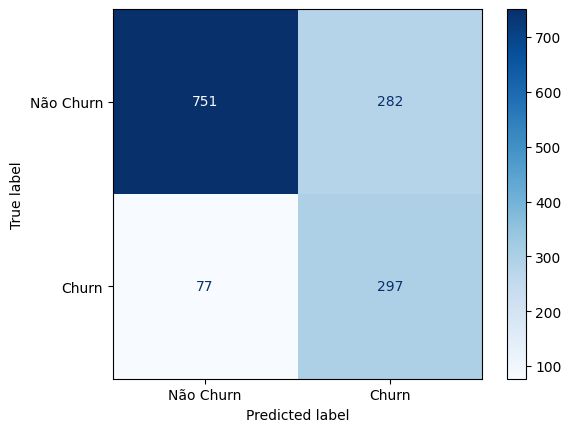



AVALIA√á√ÉO DO MODELO RANDOM FOREST

--- Performance nos Dados de TREINO ---
Acur√°cia: 0.9977
              precision    recall  f1-score   support

   N√£o Churn       1.00      1.00      1.00      4130
       Churn       0.99      1.00      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625


--- Performance nos Dados de TESTE ---
Acur√°cia: 0.7896
Relat√≥rio de Classifica√ß√£o (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

   N√£o Churn       0.82      0.91      0.86      1033
       Churn       0.65      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407


Matriz de Confus√£o (Dados de Teste):


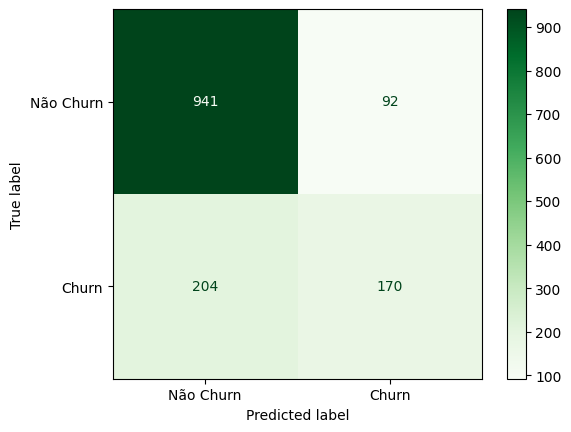

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

y_pred_train_lr = log_reg_model.predict(X_train)
y_pred_test_lr = log_reg_model.predict(X_test)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)


print("="*60)
print("AVALIA√á√ÉO DO MODELO DE REGRESS√ÉO LOG√çSTICA")
print("="*60)

print("\n--- Performance nos Dados de TREINO ---")
print(f"Acur√°cia: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print(classification_report(y_train, y_pred_train_lr, target_names=['N√£o Churn', 'Churn']))

print("\n--- Performance nos Dados de TESTE ---")
print(f"Acur√°cia: {accuracy_score(y_test, y_pred_test_lr):.4f}")
print("Relat√≥rio de Classifica√ß√£o (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred_test_lr, target_names=['N√£o Churn', 'Churn']))

print("\nMatriz de Confus√£o (Dados de Teste):")
cm_lr = confusion_matrix(y_test, y_pred_test_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['N√£o Churn', 'Churn'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.show()

print("\n\n" + "="*60)
print("AVALIA√á√ÉO DO MODELO RANDOM FOREST")
print("="*60)

print("\n--- Performance nos Dados de TREINO ---")
print(f"Acur√°cia: {accuracy_score(y_train, y_pred_train_rf):.4f}")
print(classification_report(y_train, y_pred_train_rf, target_names=['N√£o Churn', 'Churn']))

print("\n--- Performance nos Dados de TESTE ---")
print(f"Acur√°cia: {accuracy_score(y_test, y_pred_test_rf):.4f}")
print("Relat√≥rio de Classifica√ß√£o (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred_test_rf, target_names=['N√£o Churn', 'Churn']))

print("\nMatriz de Confus√£o (Dados de Teste):")
cm_rf = confusion_matrix(y_test, y_pred_test_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['N√£o Churn', 'Churn'])
disp_rf.plot(cmap=plt.cm.Greens)
plt.show()

##An√°lise de Import√¢ncia das Vari√°veis (Feature Importance)

###Import√¢ncia na Regress√£o Log√≠stica (An√°lise dos Coeficientes)

/tmp/ipython-input-13-1216242211.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coeficientes['Coeficiente'], y=top_coeficientes.index, palette='vlag')


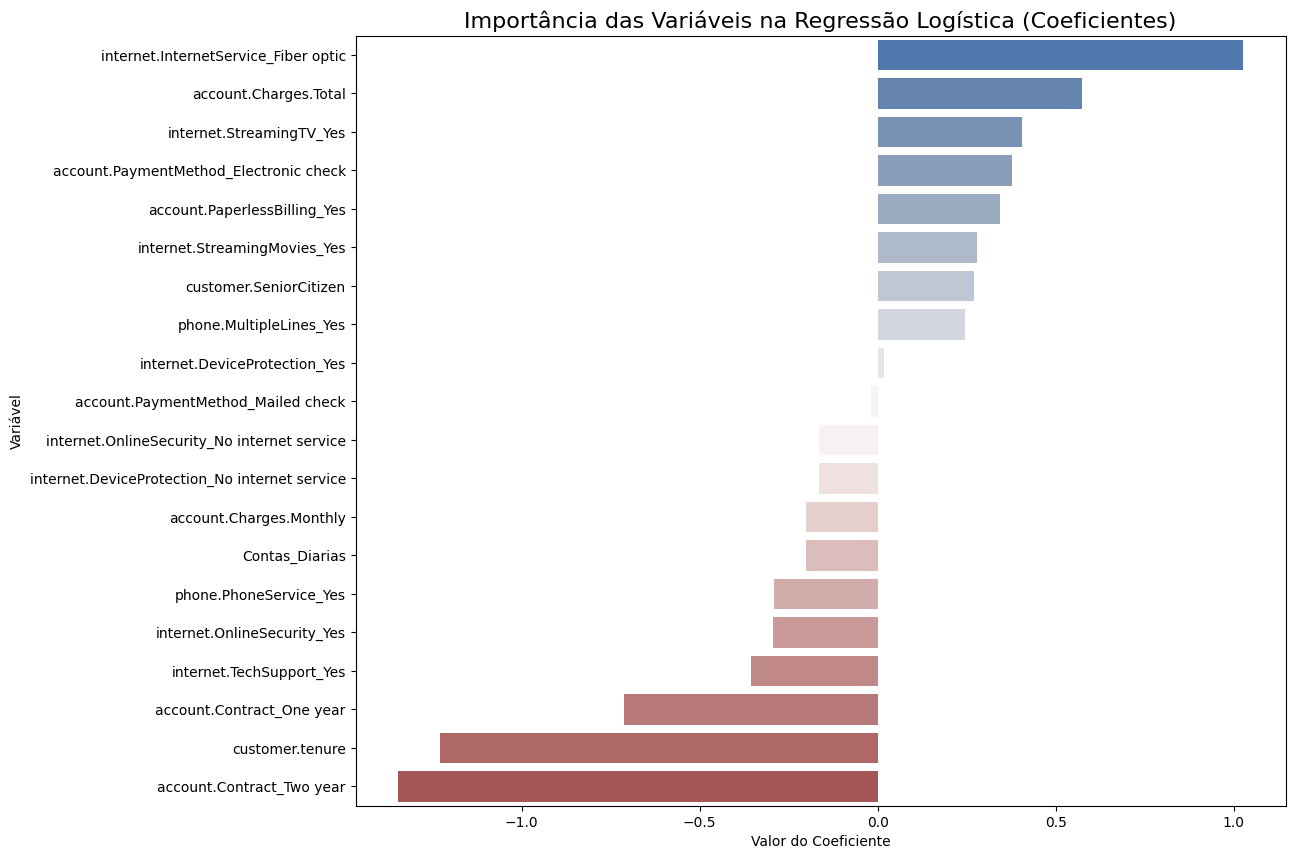

In [13]:
coeficientes = pd.DataFrame(log_reg_model.coef_[0], index=X_train.columns, columns=['Coeficiente'])

coeficientes_sorted = coeficientes.sort_values(by='Coeficiente', ascending=False)


top_positivos = coeficientes_sorted.head(10)
top_negativos = coeficientes_sorted.tail(10)
top_coeficientes = pd.concat([top_positivos, top_negativos])


plt.figure(figsize=(12, 10))
sns.barplot(x=top_coeficientes['Coeficiente'], y=top_coeficientes.index, palette='vlag')
plt.title('Import√¢ncia das Vari√°veis na Regress√£o Log√≠stica (Coeficientes)', fontsize=16)
plt.xlabel('Valor do Coeficiente')
plt.ylabel('Vari√°vel')
plt.show()

 ### Import√¢ncia no Random Forest

/tmp/ipython-input-14-2360567351.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df.head(20), palette='viridis')


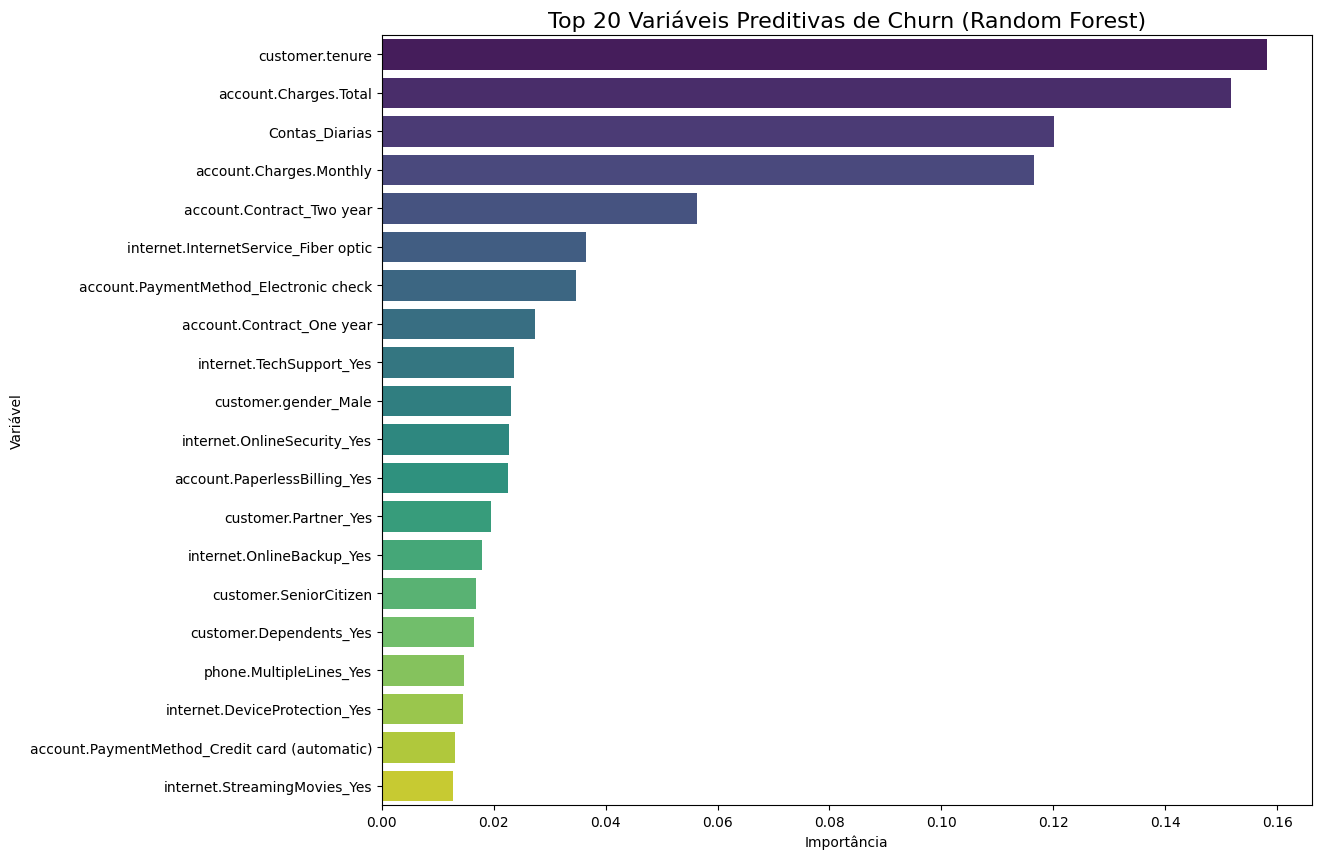

In [14]:
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(20), palette='viridis')
plt.title('Top 20 Vari√°veis Preditivas de Churn (Random Forest)', fontsize=16)
plt.xlabel('Import√¢ncia')
plt.ylabel('Vari√°vel')
plt.show()

# üìÑ Relat√≥rio Final: An√°lise Preditiva de Evas√£o de Clientes (Churn) | Telecom X

## 1. Resumo do Projeto e Objetivos
O presente projeto teve como objetivo desenvolver modelos de Machine Learning capazes de prever a probabilidade de um cliente cancelar seu servi√ßo (churn) na Telecom X. A partir da identifica√ß√£o dos principais fatores de risco, o objetivo final √© propor estrat√©gias de reten√ß√£o para mitigar a perda de receita e aumentar a fideliza√ß√£o.


---


## 2. Metodologia
Foram testados dois modelos de classifica√ß√£o: Regress√£o Log√≠stica e Random Forest. Os dados foram previamente tratados, codificados e padronizados para garantir a melhor performance dos algoritmos. A avalia√ß√£o foi realizada com base em m√©tricas como Acur√°cia, Precis√£o, Recall, F1-Score e Matriz de Confus√£o, com foco especial no Recall da classe "Churn", que mede a capacidade do modelo de identificar os clientes que de fato cancelar√£o.


---


## 3. An√°lise de Desempenho dos Modelos
Ap√≥s a avalia√ß√£o, o modelo de Regress√£o Log√≠stica foi selecionado como o mais adequado para o problema de neg√≥cio. Embora o Random Forest tenha apresentado uma acur√°cia geral ligeiramente superior (79% vs 74%), a Regress√£o Log√≠stica demonstrou uma capacidade muito maior de identificar os clientes em risco de evas√£o, com um Recall de 79% para a classe "Churn", contra apenas 45% do Random Forest. Para uma campanha de reten√ß√£o, √© mais vantajoso identificar o m√°ximo de churners poss√≠vel, mesmo que isso resulte em alguns contatos desnecess√°rios.


---


## 4. Fatores que Mais Influenciam a Evas√£o
A an√°lise de import√¢ncia de vari√°veis de ambos os modelos revelou, com alta consist√™ncia, os seguintes fatores como os principais preditores de churn:

* **Fator Principal (Reten√ß√£o)**: **Tempo de Contrato** `(tenure)`: √â a vari√°vel de maior impacto. Quanto mais tempo um cliente est√° na base, menor a sua chance de cancelar. Clientes novos s√£o o grupo de maior risco.

* **Fator Principal (Risco)**: **Contrato Mensal** `(account.Contract_Month-to-month)`: Ter um contrato sem fidelidade anual √© o maior indicador de risco de evas√£o.

* **Fator de Risco Secund√°rio**: **Cobran√ßas Mensais** `(account.Charges.Monthly)`: Clientes com faturas mensais mais altas tendem a cancelar mais.

* Outros Fatores de Risco Relevantes:

 * **Pagamento com Cheque Eletr√¥nico** `(account.PaymentMethod_Electronic check)`: Este m√©todo de pagamento est√° associado a um maior risco de churn.

 * **Servi√ßo de Fibra √ìtica** `(internet.InternetService_Fiber optic)`: Indica um poss√≠vel problema de satisfa√ß√£o (pre√ßo ou qualidade) com este servi√ßo espec√≠fico.

 * **Falta de Suporte T√©cnico** `(internet.TechSupport_No)`: Clientes sem acesso a suporte t√©cnico dedicado s√£o mais propensos a cancelar.


---


## 5. Propostas e Estrat√©gias de Reten√ß√£o
Com base nos fatores identificados, recomendamos as seguintes estrat√©gias de neg√≥cio para a Telecom X:


1. **Programa de Reten√ß√£o para Novos Clientes:** Criar uma jornada de acompanhamento focada nos clientes com menos de 12 meses de contrato. Oferecer um canal de suporte proativo e verificar a satisfa√ß√£o nos primeiros meses, per√≠odo mais cr√≠tico para o churn.

2. **Campanhas de Fideliza√ß√£o de Contrato:** Lan√ßar campanhas direcionadas para clientes com contrato mensal, oferecendo descontos ou benef√≠cios claros para a migra√ß√£o para planos anuais ou de dois anos.

3. **Incentivo a Pagamentos Autom√°ticos:** Para clientes que utilizam cheque eletr√¥nico, oferecer um pequeno desconto ou b√¥nus para a mudan√ßa para pagamento via cart√£o de cr√©dito ou d√©bito autom√°tico, o que aumenta a conveni√™ncia e reduz o churn por esquecimento ou atrito.

4. **Revis√£o do Pacote de Fibra √ìtica:** A equipe de produtos deve investigar a fundo a causa do alto churn entre clientes de fibra √≥tica. A solu√ß√£o pode envolver um reajuste de pre√ßo, uma melhoria na estabilidade da conex√£o ou a inclus√£o de servi√ßos de valor agregado, como o suporte t√©cnico, que foi identificado como um fator de reten√ß√£o.

Com a implementa√ß√£o destas estrat√©gias, a Telecom X poder√° utilizar os insights gerados por dados para agir de forma proativa, reduzindo a taxa de churn e fortalecendo sua base de clientes.